In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [3]:
#依次画出每个样本的数据
def plot_all_data(data):
    if not type(data)==pd.core.frame.DataFrame:
        data=pd.DataFrame(data)
        for i in range(len(data.index)):
            data.iloc[i].plot()
            plt.title(data.index[i])
            plt.show()
    elif type(data)==pd.core.frame.DataFrame:
        for i in range(len(data.index)):
            data.iloc[i].plot()
            plt.title(data.index[i])
            plt.show()
    else:
        print('请检查数据类型')

In [4]:
local_path=os.getcwd()
scada_reshaped_inter=pd.read_csv(local_path+'\\TYQdata\\scada_reshaped_inter.csv',parse_dates=[0],index_col=0)

In [14]:
def scan(x,eps,min_samples):
    ccc=scada_reshaped_inter.iloc[x]
    ddd=np.array(ccc).reshape(1440,1)
    ttt=np.arange(0,1440,1).reshape(1440,1)
    qqq=np.concatenate((ttt,ddd),axis=1)
    X=qqq
    Q=qqq.T
    ##设置分层聚类函数
    db = DBSCAN(eps, min_samples)
    ##训练数据
    db.fit(X)
    ##初始化一个全是False的bool类型的数组
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    '''
       这里是关键点(针对这行代码：xy = X[class_member_mask & ~core_samples_mask])：
       db.core_sample_indices_  表示的是某个点在寻找核心点集合的过程中暂时被标为噪声点的点(即周围点
       小于min_samples)，并不是最终的噪声点。在对核心点进行联通的过程中，这部分点会被进行重新归类(即标签
       并不会是表示噪声点的-1)，也可也这样理解，这些点不适合做核心点，但是会被包含在某个核心点的范围之内
    '''
    core_samples_mask[db.core_sample_indices_] = True
    ##每个数据的分类
    labels = db.labels_
    k_num = sum(labels==-1)
    print('噪声数量：',k_num)
    ##分类个数：lables中包含-1，表示噪声点
    n_clusters_ =len(np.unique(labels)) - (1 if -1 in labels else 0)
    ##绘图
    unique_labels = set(labels)
    '''
       1)np.linspace 返回[0,1]之间的len(unique_labels) 个数
       2)plt.cm 一个颜色映射模块
       3)生成的每个colors包含4个值，分别是rgba
       4)其实这行代码的意思就是生成4个可以和光谱对应的颜色值
    '''
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    plt.figure(1)
    plt.clf()
    for k, col in zip(unique_labels, colors):
        ##-1表示噪声点,这里的k表示黑色
        if k == -1:
            col = 'k'
        ##生成一个True、False数组，lables == k 的设置成True
        class_member_mask = (labels == k)
        ##两个数组做&运算，找出即是核心点又等于分类k的值  markeredgecolor='k',
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=14)
        '''
           1)~优先级最高，按位对core_samples_mask 求反，求出的是噪音点的位置
           2)& 于运算之后，求出虽然刚开始是噪音点的位置，但是重新归类却属于k的点
           3)对核心分类之后进行的扩展
        '''
        xy = X[class_member_mask & ~core_samples_mask]     
        plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    plt.scatter(Q[0,:],Q[1,:])
    plt.show()
    plt.plot(Q[0,:],Q[1,:])
    plt.show()

D:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass min_samples=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


噪声数量： 118


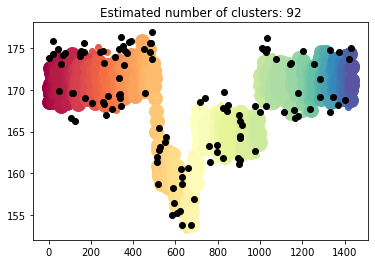

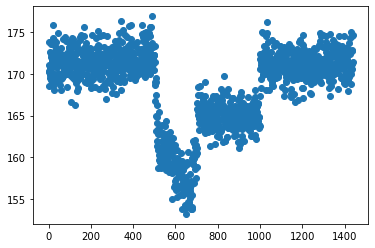

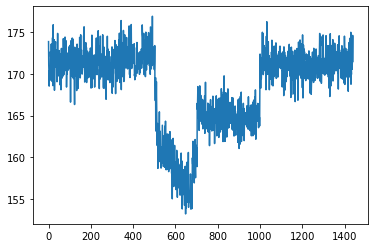

In [57]:
scan(10,2.64,3)